In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.colors import rgb2hex
import numpy as np

In [2]:
def create_world_map() -> plt.Figure:
    """
    Creates a world map.

    return: a figure object
    """

    world_map = Basemap(
        projection="robin",
        lon_0=0,
        resolution="c",
    )

    # load the shapefile, use the name 'countries'
    world_map.readshapefile(
        "../../../resources/shapefiles/world/ne_110m_admin_0_countries",
        name="countries",
        drawbounds=True,
    )

    return world_map


def update_country_color(
    world_map, country_name: str, color: str, ax: plt.Axes
) -> None:
    """
    Updates the color of a country in the map.

    :param world_map: The map object.
    :param country_name: The name of the country.
    :param color: The color to update the country to.
    :param ax: The axis object.
    """
    country_names = []
    for shape_dict in world_map.countries_info:
        country_names.append(shape_dict["NAME"])

    def all_indices():
        return [i for i, x in enumerate(country_names) if x == country_name]

    for index in all_indices():
        seg = world_map.countries[index]
        poly = Polygon(seg, facecolor=color, edgecolor=color)
        ax.add_patch(poly)

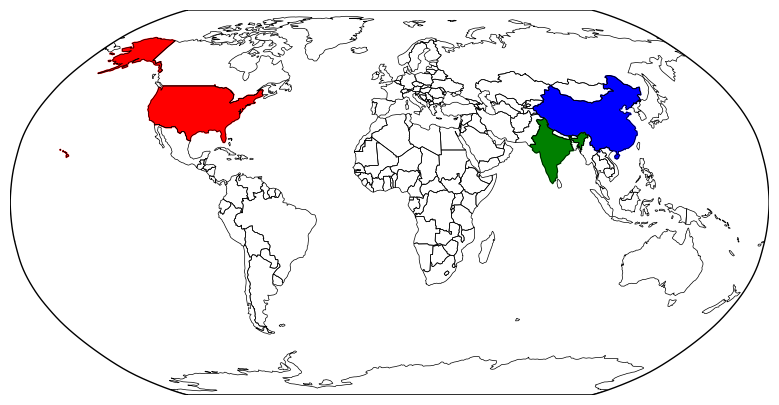

In [3]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
world_map = create_world_map()

# update the color of the countries
update_country_color(world_map, "United States of America", "red", ax)
update_country_color(world_map, "China", "blue", ax)
update_country_color(world_map, "India", "green", ax)

plt.show()